# HSE 2021: Mathematical Methods for Data Analysis

## Homework 2

### Attention!
* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make coclusions) then **text answer** is **mandatory** and **is** part of the task
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLSResults
from math import sqrt
import random

%matplotlib inline

sns.set(style="darkgrid")

### Data

For this homework we use Boston Dataset from sklearn (based on UCI ML housing dataset).

In [2]:
data = load_boston() # load dataset

X = data.data
y = data.target
columns = data.feature_names

In [3]:
print(X.shape)
print(y.shape)
print(columns.shape)
print(columns)

(506, 13)
(506,)
(13,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


## Linear regression

#### 1. [0.5 points] 
Create Pandas DataFrame and split the data into train and test sets with ratio 80:20 with random_state=0.

In [4]:
df = pd.DataFrame(X, columns=columns)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(df, y, test_size=0.2, random_state=0)
X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 220 to 172
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(13)
memory usage: 44.2 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 329 to 108
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     102 non-null    float64
 1   ZN       102 non-null    float64
 2   INDUS    102 non-

---
#### 2. [1 point] 
Train models on train data using StatsModels( or sckit-learn) library and apply it to the test set; use $RMSE$ and $R^2$ as the quality measure.

* [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html);
* [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) with $\alpha = 0.01$;
* [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) with $\alpha = 0.01$

Don't forget to scale the data before training the models with StandardScaler!

In [6]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=columns)
X_train_scaled.info()
X_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     102 non-null    float64
 1   ZN       102 non-null    float64
 2   INDUS    102 non-null

In [7]:
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)
linear_regression_model = sm.OLS(y_train, X_train_scaled)

linear_regression_results = linear_regression_model.fit()
linear_regression_y_pred = linear_regression_results.predict(X_test_scaled)

print("Linear regression: test RMSE = %.4f" % sqrt(mean_squared_error(y_test, linear_regression_y_pred)))
print("Linear regression: test R^2 = %.4f" % r2_score(y_test, linear_regression_y_pred))

Linear regression: test RMSE = 5.7835
Linear regression: test R^2 = 0.5892


In [8]:
ridge_results = linear_regression_model.fit_regularized(L1_wt=0, alpha=0.01)
ridge_y_pred = ridge_results.predict(X_test_scaled)

print("Ridge: test RMSE = %.4f" % sqrt(mean_squared_error(y_test, ridge_y_pred)))
print("Ridge: test R^2 = %.4f" % r2_score(y_test, ridge_y_pred))

Ridge: test RMSE = 5.8270
Ridge: test R^2 = 0.5830


In [9]:
lasso_results = linear_regression_model.fit_regularized(L1_wt=1, alpha=0.01)
lasso_y_pred = lasso_results.predict(X_test_scaled)

print("Lasso: test RMSE = %.4f" % sqrt(mean_squared_error(y_test, lasso_y_pred)))
print("Lasso: test R^2 = %.4f" % r2_score(y_test, lasso_y_pred))

Lasso: test RMSE = 5.7962
Lasso: test R^2 = 0.5874


---
#### 3. [1 point] 
Explore the values of the parameters of the resulting models and compare the number of zero weights in them. 

Comment on the significance of the coefficients, overal model significance and other related factors from the results table. 

`Hint` Use StatModels to obtain significance of the coefficients. They ca be found on the `summary` of the fitted linear model. 
It might be tricky to obtain `summary` for the regularized model. Please, read the documentation of the StatModels library to figure out how to do that, e.g.   [OLSResults](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.html#statsmodels.regression.linear_model.OLSResults) class might be useful here.

In [10]:
linear_regression_results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.765    
Dependent Variable: y                AIC:                2370.9385
Date:               2021-10-11 23:45 BIC:                2426.9583
No. Observations:   404              Log-Likelihood:     -1171.5  
Df Model:           13               F-statistic:        102.2    
Df Residuals:       390              Prob (F-statistic): 9.64e-117
R-squared:          0.773            Scale:              20.020   
--------------------------------------------------------------------
           Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const     22.6119     0.2226   101.5764   0.0000   22.1742   23.0495
CRIM      -0.9708     0.2980    -3.2575   0.0012   -1.5568   -0.3849
ZN         1.0571     0.3408     3.1022   0.0021    0.3872    1.7271
INDUS      0.0383     0.4428     0.0865   0.9311   -0.8324    0.9090
CHAS       0.5945     0.2291     2.5946   0.0098    0.1440    1.0450
NOX       -1.8551     0.4846    -3.8282   0.0002   -2.8079   -0.9024
RM         2.5732     0.3175     8.1058   0.0000    1.9491    3.1974
AGE       -0.0876     0.4022    -0.2178   0.8277   -0.8784    0.7032
DIS       -2.8809     0.4446    -6.4800   0.0000   -3.7550   -2.0068
RAD        2.1122     0.6069     3.4805   0.0006    0.9191    3.3054
TAX       -1.8753     0.6652    -2.8191   0.0051   -3.1832   -0.5675
PTRATIO   -2.2928     0.3003    -7.6359   0.0000   -2.8831   -1.7024
B          0.7182     0.2613     2.7486   0.0063    0.2045    1.2319
LSTAT     -3.5925     0.3954    -9.0855   0.0000   -4.3698   -2.8151
------------------------------------------------------------------
Omnibus:             141.494       Durbin-Watson:          1.996  
Prob(Omnibus):       0.000         Jarque-Bera (JB):       629.882
Skew:                1.470         Prob(JB):               0.000  
Kurtosis:            8.365         Condition No.:          10     
==================================================================

"""

In [11]:
OLSResults(linear_regression_model, ridge_results.params, linear_regression_model.normalized_cov_params).summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.765    
Dependent Variable: y                AIC:                2372.3540
Date:               2021-10-11 23:45 BIC:                2428.3738
No. Observations:   404              Log-Likelihood:     -1172.2  
Df Model:           13               F-statistic:        101.7    
Df Residuals:       390              Prob (F-statistic): 1.90e-116
R-squared:          0.772            Scale:              20.091   
--------------------------------------------------------------------
           Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const     22.3880     0.2230   100.3946   0.0000   21.9496   22.8264
CRIM      -0.9389     0.2986    -3.1449   0.0018   -1.5259   -0.3519
ZN         0.9965     0.3414     2.9190   0.0037    0.3253    1.6676
INDUS     -0.0576     0.4436    -0.1298   0.8968   -0.9298    0.8146
CHAS       0.6098     0.2295     2.6566   0.0082    0.1585    1.0611
NOX       -1.7222     0.4854    -3.5477   0.0004   -2.6766   -0.7678
RM         2.6120     0.3180     8.2135   0.0000    1.9868    3.2372
AGE       -0.1155     0.4029    -0.2867   0.7745   -0.9078    0.6767
DIS       -2.7539     0.4454    -6.1834   0.0000   -3.6295   -1.8783
RAD        1.8348     0.6079     3.0181   0.0027    0.6396    3.0301
TAX       -1.6265     0.6664    -2.4407   0.0151   -2.9366   -0.3163
PTRATIO   -2.2561     0.3008    -7.5007   0.0000   -2.8475   -1.6648
B          0.7188     0.2617     2.7463   0.0063    0.2042    1.2334
LSTAT     -3.5287     0.3961    -8.9086   0.0000   -4.3074   -2.7499
------------------------------------------------------------------
Omnibus:             147.660       Durbin-Watson:          1.990  
Prob(Omnibus):       0.000         Jarque-Bera (JB):       694.793
Skew:                1.521         Prob(JB):               0.000  
Kurtosis:            8.659         Condition No.:          10     
==================================================================

"""

In [12]:
OLSResults(linear_regression_model, lasso_results.params, linear_regression_model.normalized_cov_params).summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.765    
Dependent Variable: y                AIC:                2371.0439
Date:               2021-10-11 23:45 BIC:                2427.0637
No. Observations:   404              Log-Likelihood:     -1171.5  
Df Model:           13               F-statistic:        102.1    
Df Residuals:       390              Prob (F-statistic): 1.01e-116
R-squared:          0.773            Scale:              20.025   
--------------------------------------------------------------------
           Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const     22.6019     0.2226   101.5182   0.0000   22.1642   23.0396
CRIM      -0.9403     0.2981    -3.1547   0.0017   -1.5263   -0.3543
ZN         1.0215     0.3408     2.9972   0.0029    0.3514    1.6916
INDUS      0.0000     0.4429     0.0000   1.0000   -0.8708    0.8708
CHAS       0.5948     0.2292     2.5955   0.0098    0.1442    1.0453
NOX       -1.8029     0.4847    -3.7200   0.0002   -2.7558   -0.8500
RM         2.5852     0.3175     8.1423   0.0000    1.9609    3.2094
AGE       -0.0690     0.4023    -0.1715   0.8639   -0.8599    0.7220
DIS       -2.8085     0.4446    -6.3162   0.0000   -3.6827   -1.9343
RAD        1.9567     0.6070     3.2238   0.0014    0.7634    3.1501
TAX       -1.7392     0.6653    -2.6141   0.0093   -3.0472   -0.4311
PTRATIO   -2.2788     0.3003    -7.5884   0.0000   -2.8692   -1.6884
B          0.7056     0.2613     2.7000   0.0072    0.1918    1.2193
LSTAT     -3.5969     0.3955    -9.0956   0.0000   -4.3744   -2.8194
------------------------------------------------------------------
Omnibus:             143.585       Durbin-Watson:          1.997  
Prob(Omnibus):       0.000         Jarque-Bera (JB):       649.888
Skew:                1.488         Prob(JB):               0.000  
Kurtosis:            8.455         Condition No.:          10     
==================================================================

"""

```Модели показали схожие результаты, причём качество всех моделей достаточно высокое: (R^2 ~ 0.773, F-statistic > 100). Незначимыми оказались параметры INDUS (P > 0.89) и AGE (P > 0.77).```


---
#### 4. [1 point] 
Implement one of the elimination algorithms that were described in the Seminar_4 (Elimination by P-value, Forward elimination, Backward elimination), make conclusions. 
It's enough to apply to one of the models above (e.g simple linear regression)

In [13]:
def get_mse(df, y, test_size):
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(df, y, test_size=test_size, random_state=0)
    X_train_scaled = sm.add_constant(pd.DataFrame(scaler.fit_transform(X_train), columns=df.columns))
    X_test_scaled = sm.add_constant(pd.DataFrame(scaler.transform(X_test), columns=df.columns))
    return mean_squared_error(y_test, sm.OLS(y_train, X_train_scaled).fit().predict(X_test_scaled))

In [14]:
def get_worst_mse(df, y, test_size):
    mse_array = np.zeros(dtype=np.float64, shape=(len(df.columns)))
    for index in range(0, len(df.columns)):
        mse_array[index] = get_mse(df.drop(df.columns[index], axis=1), y, test_size)
    return np.argsort(mse_array)[0], np.min(mse_array)

In [15]:
def forward(df, y, test_size):
    cur_mse = get_mse(df, y, test_size)
    while len(df.columns) > 0:
        index_of_worst, worst_mse = get_worst_mse(df, y, test_size)
        if worst_mse >= cur_mse:
            return cur_mse, df
        df = df.drop(df.columns[index_of_worst], axis=1)
        cur_mse = worst_mse
    return cur_mse, df

In [16]:
print('Initial RMSE:', sqrt(get_mse(df, y, 0.2)))
new_mse, new_df = forward(df, y, 0.2)
print('New RMSE:', sqrt(new_mse))
print([item for item in df.columns.to_list() if item not in new_df.columns.to_list()])
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(df, y, test_size=0.2, random_state=0)
X_train_scaled = sm.add_constant(pd.DataFrame(scaler.fit_transform(X_train), columns=df.columns))
X_test_scaled = sm.add_constant(pd.DataFrame(scaler.transform(X_test), columns=df.columns))
sm.OLS(y_train, X_train_scaled).fit().summary2()

Initial RMSE: 5.78350931508514
New RMSE: 5.780222921822188
['AGE']


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.765    
Dependent Variable: y                AIC:                2370.9385
Date:               2021-10-11 23:46 BIC:                2426.9583
No. Observations:   404              Log-Likelihood:     -1171.5  
Df Model:           13               F-statistic:        102.2    
Df Residuals:       390              Prob (F-statistic): 9.64e-117
R-squared:          0.773            Scale:              20.020   
--------------------------------------------------------------------
           Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const     22.6119     0.2226   101.5764   0.0000   22.1742   23.0495
CRIM      -0.9708     0.2980    -3.2575   0.0012   -1.5568   -0.3849
ZN         1.0571     0.3408     3.1022   0.0021    0.3872    1.7271
INDUS      0.0383     0.4428     0.0865   0.9311   -0.8324    0.9090
CHAS       0.5945     0.2291     2.5946   0.0098    0.1440    1.0450
NOX       -1.8551     0.4846    -3.8282   0.0002   -2.8079   -0.9024
RM         2.5732     0.3175     8.1058   0.0000    1.9491    3.1974
AGE       -0.0876     0.4022    -0.2178   0.8277   -0.8784    0.7032
DIS       -2.8809     0.4446    -6.4800   0.0000   -3.7550   -2.0068
RAD        2.1122     0.6069     3.4805   0.0006    0.9191    3.3054
TAX       -1.8753     0.6652    -2.8191   0.0051   -3.1832   -0.5675
PTRATIO   -2.2928     0.3003    -7.6359   0.0000   -2.8831   -1.7024
B          0.7182     0.2613     2.7486   0.0063    0.2045    1.2319
LSTAT     -3.5925     0.3954    -9.0855   0.0000   -4.3698   -2.8151
------------------------------------------------------------------
Omnibus:             141.494       Durbin-Watson:          1.996  
Prob(Omnibus):       0.000         Jarque-Bera (JB):       629.882
Skew:                1.470         Prob(JB):               0.000  
Kurtosis:            8.365         Condition No.:          10     
==================================================================

"""

```Как мы видим, в результате Forward Elimination все значимые параметры остались в модели и только 1 из незначимых параметров был исключён из рассмотрение, причём более незначимый (в соответствии с P) INDUS остался.```

---
#### 5. [1 point] 
Find the best (in terms of RMSE) $\alpha$ for Ridge regression using cross-validation with 5 folds. You must select values from range $[10^{-4}, 10^{3}]$.

Best alpha = 5.7248


Text(0, 0.5, 'CV score')

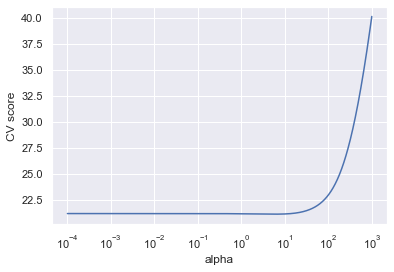

In [17]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(df, y, test_size=0.2, random_state=0)
X_train_scaled = sm.add_constant(pd.DataFrame(scaler.fit_transform(X_train), columns=df.columns))
X_test_scaled = sm.add_constant(pd.DataFrame(scaler.transform(X_test), columns=df.columns))

alphas = np.logspace(-4, 3, 1000)
searcher = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring="neg_mean_squared_error", cv=5)
searcher.fit(X_train_scaled, y_train)
print("Best alpha = %.4f" % searcher.best_params_["alpha"])

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

---
## Gradient descent

#### 6. [3.5 points] 
**Implement a linear regression model for the MSE loss function, trained by gradient descent.**

All calculations must be vectorized, and python loops can only be used for gradient descent iterations. As a stop criterion, you must use (simultaneously):

* checking for the Euclidean norm of the weight difference on two adjacent iterations (for example, less than some small number of the order of $10^{-6}$, set by the `tolerance` parameter);
* reaching the maximum number of iterations (for example, 10000, set by the `max_iter` parameter).

You need to implement:

* Full gradient descent:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

* Stochastic Gradient Descent:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$

$\nabla_{w} q_{i_{k}}(w_{k}) \, $ is the estimate of the gradient over the batch of objects selected randomly.

* Momentum method:

$$
h_0 = 0, \\
h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} q_{i_{k}} (w_{k}), \\
w_{k + 1} = w_{k} - h_{k + 1}.
$$

Exponentially weighed averages can provide a better estimate which is closer to the actual gradient.


To make sure that the optimization process really converges, we will use the `loss_history` class attribute. After calling the `fit` method, it should contain the values of the loss function for all iterations, starting from the first one (before the first step on the anti-gradient).

You need to initialize the weights with a zero or random (from a normal distribution) vector. The following is a template class that needs to contain the code implementing all variations of the models.

In [18]:
from sklearn.base import BaseEstimator

class LinReg(BaseEstimator):
    def __init__(self, delta=1.0, gd_type='Momentum', 
                 tolerance=1e-4, max_iter=1000, w0=None, eta=1e-2, alpha=1e-3):
        """
        gd_type: str
            'GradientDescent', 'StochasticDescent', 'Momentum'
        delta: float
            proportion of object in a batch (fot stochastic GD)
        tolerance: float
            for stopping gradient descent
        max_iter: int
            maximum number of steps in gradient descent
        w0: np.array of shape (d)
            init weights
        eta: float
            learning rate
        alpha: float
            momentum coefficient
        """
        self.gd_type = gd_type
        self.delta = delta
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.eta = eta
        self.loss_history = None # list of loss function values at each training iteration
    
    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        if self.gd_type not in ['GradientDescent', 'StochasticDescent', 'Momentum']:
            raise Exception('Unknown type')
        np.random.seed(0)
        self.loss_history = []
        if self.w0 is None:
            self.w0 = np.zeros(X.shape[1])
        self.w = np.array(self.w0)
        cur_w = np.array(self.w)
        h = np.zeros(X.shape[1])
        
        for i in range(0, self.max_iter):
            if self.gd_type == 'GradientDescent':
                self.w -= self.eta * self.calc_gradient(X, y)
            elif self.gd_type == 'StochasticDescent':
                indexes = np.random.choice(X.shape[0], int(X.shape[0] * self.delta))
                self.w -= self.eta * self.calc_gradient(np.take(X, indexes, axis=0), np.take(y, indexes))
            else:
                indexes = np.random.choice(X.shape[0], int(X.shape[0] * self.delta))
                h = self.alpha * h + self.eta * self.calc_gradient(np.take(X, indexes, axis=0), np.take(y, indexes))
                self.w -= h
            self.loss_history.append(self.calc_loss(X, y))
            if np.linalg.norm(self.w - cur_w) < self.tolerance:
                break
            cur_w = np.array(self.w)
        
        return self
    
    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        return np.dot(X, self.w)
    
    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        return 2 * np.dot(X.T, np.dot(X, self.w) - y) / y.shape[0]

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float 
        """ 
        return np.mean((self.predict(X) - y) ** 2)

#### 7. [1 points] 
Train and validate "hand-written" model (simple linear regression) on the same data, and compare the quality with the Sklearn or StatsModels methods. Investigate the effect of the `max_iter` and `alpha` parameters on the optimization process. Is it consistent with your expectations?

In [19]:
momentum_model = LinReg(gd_type='Momentum', max_iter=5000).fit(X_train_scaled, y_train)
print("Test RMSE = %.4f" % sqrt(mean_squared_error(y_test, momentum_model.predict(X_test_scaled))))

Test RMSE = 5.7860


In [ ]:
gd_types = np.array(['GradientDescent', 'StochasticDescent', 'Momentum'])
max_iters = np.arange(50, 5000, 200)
alphas = np.logspace(-4, 3, 20)
searcher = GridSearchCV(LinReg(), [{"gd_type": gd_types, "max_iter": max_iters, "alpha": alphas}], 
                        scoring="neg_mean_squared_error", cv=5)
searcher.fit(X_train_scaled, y_train)
print("Best gd_type = %s" % searcher.best_params_["gd_type"])
print("Best max_iter = %d" % searcher.best_params_["max_iter"])
print("Best alpha = %.4f" % searcher.best_params_["alpha"])
print("Test RMSE = %.4f" % sqrt(mean_squared_error(y_test, LinReg(gd_type='', max_iter=, alpha=).fit(X_train_scaled, y_train).predict(X_test_scaled))))

```Модель LinReg для Momentum имеет немного большую ошибку, чем встроенные модели из задачи 1.```

#### 8. [1 points] 
Plot graphs (on the same picture) of the dependence of the loss function value on the iteration number for Full GD, SGD and Momentum. Draw conclusions about the rate of convergence of various modifications of gradient descent.

Don't forget about what *beautiful* graphics should look like!

In [ ]:
# your code here 
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

```your conclusions here```